In [2]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For enhanced visualizations

# Scikit-learn imports
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# TensorFlow imports (for Neural Networks)
import tensorflow as tf

# Suppress warnings (optional, for cleaner output)
import warnings
warnings.filterwarnings('ignore')


In [10]:
df = pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\seattle-weather.csv')
df.describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Making the data impure by inserting NaN values

In [11]:
eligible_columns = [col for col in df.columns]
num_nans = 1200
for _ in range(num_nans):
    # Choose a random row
    row = np.random.randint(0, df.shape[0])
    # Choose a random column from eligible columns
    col = np.random.choice(eligible_columns)
    # Set the selected cell to NaN
    df.loc[row, col] = np.nan
print("DataFrame with random NaNs (first column unchanged):")
print(df)
#df to csv
df.to_csv(r"C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_NaN.csv", index=False)

DataFrame with random NaNs (first column unchanged):
            date  precipitation  temp_max  temp_min  wind  weather
0            NaN            NaN      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9       NaN       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3      NaN
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4            NaN            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457         NaN            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459         NaN            NaN       NaN      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


Loading the impure dataset and making a different CSV file for min values

In [14]:

# Load the impure dataset
impure_data = pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_NaN.csv')

# Replace NaN with the minimum value in each column
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

for col in numerical_cols:
    min_value = impure_data[col].min(skipna=True)  # Calculate minimum excluding NaN
    impure_data[col].fillna(min_value, inplace=True)

# Save the cleaned data
cleaned_data_path = (r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_min.csv')
impure_data.to_csv(cleaned_data_path, index=False)

# Display the cleaned data
print("Sample Cleaned Data:")
print(impure_data.head())


Sample Cleaned Data:
         date  precipitation  temp_max  temp_min  wind  weather
0         NaN            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      -1.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3      NaN
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4         NaN            1.3       8.9       2.8   6.1     rain


In [15]:
print("Available columns in the dataset:")
print(impure_data.columns)

Available columns in the dataset:
Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


Training the Models

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Model Comparison Results:
                        MAE       MSE  R2 Score
Linear Regression  0.704138  0.888937  0.144209
Neural Network     0.603931  0.759397  0.268919
Decision Tree      0.743605  1.204892 -0.159965
Random Forest      0.650430  0.932117  0.102639
SVM                0.552904  0.781877  0.247277
Gradient Boosting  0.576238  0.754469  0.273663


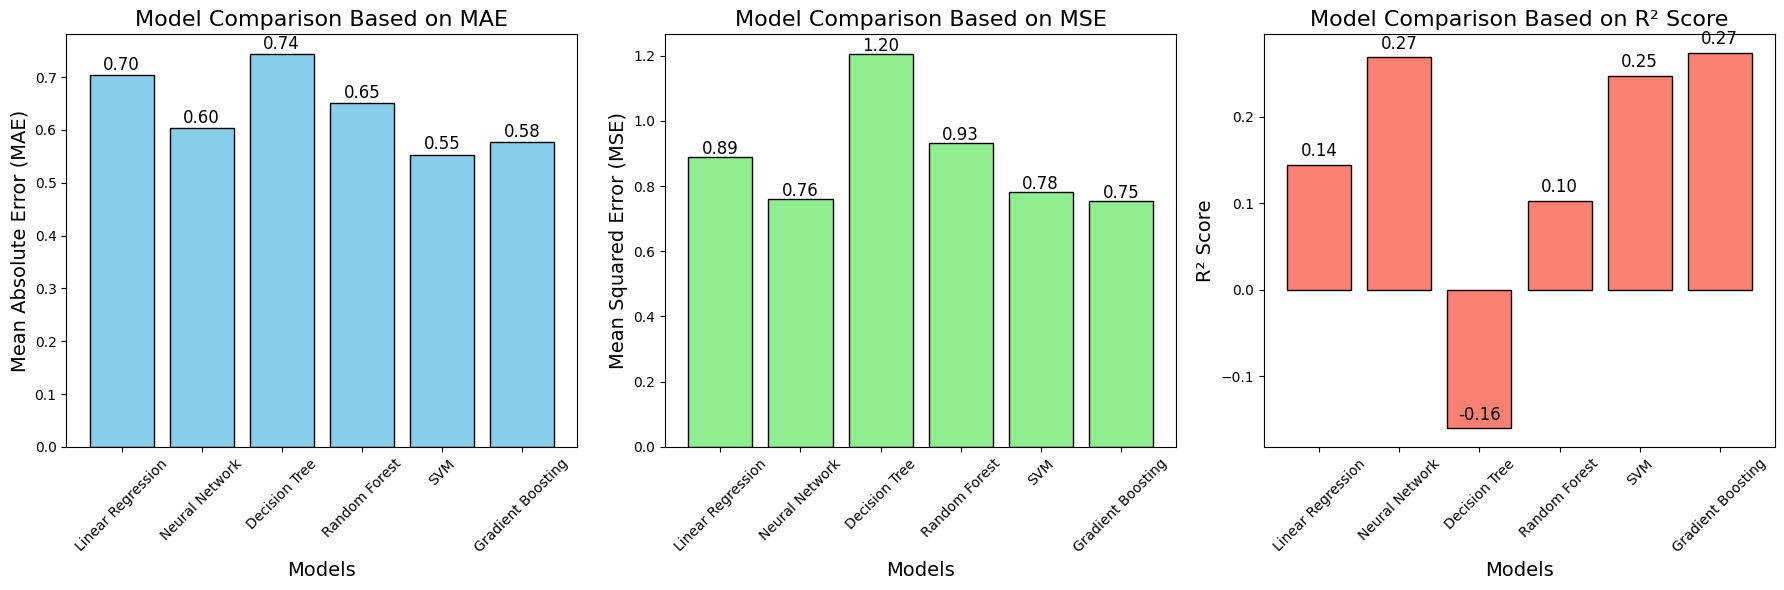


Best Model in comparison to MAE (minimized): SVM
Performance Comparison: 
MAE         0.552904
MSE         0.781877
R2 Score    0.247277
Name: SVM, dtype: float64

Best Model in comparison to MSE (minimized): Gradient Boosting
Performance Comparison: 
MAE         0.576238
MSE         0.754469
R2 Score    0.273663
Name: Gradient Boosting, dtype: float64

Best Model in comparison to R² Score (maximized): Gradient Boosting
Performance Comparison: 
MAE         0.576238
MSE         0.754469
R2 Score    0.273663
Name: Gradient Boosting, dtype: float64


In [ ]:

# Assuming impure_data and numerical_cols are predefined
scaler = StandardScaler()
standardized_data = impure_data.copy()
standardized_data[numerical_cols] = scaler.fit_transform(impure_data[numerical_cols])

# Prepare features and target
X = standardized_data[['temp_min', 'precipitation', 'wind']].values
y = standardized_data['temp_max'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train models
results = {}  # Store results for each model

# 1. Linear Regression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)
y_pred_lr = regressor_lr.predict(X_test)
results['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2 Score': r2_score(y_test, y_pred_lr),
}

# 2. Neural Network
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model_nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_nn.fit(X_train, y_train, epochs=50, verbose=0, batch_size=16)
y_pred_nn = model_nn.predict(X_test).flatten()
results['Neural Network'] = {
    'MAE': mean_absolute_error(y_test, y_pred_nn),
    'MSE': mean_squared_error(y_test, y_pred_nn),
    'R2 Score': r2_score(y_test, y_pred_nn),
}

# 3. Decision Tree
regressor_dt = DecisionTreeRegressor(random_state=42)
regressor_dt.fit(X_train, y_train)
y_pred_dt = regressor_dt.predict(X_test)
results['Decision Tree'] = {
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2 Score': r2_score(y_test, y_pred_dt),
}

# 4. Random Forest
regressor_rf = RandomForestRegressor(random_state=42, n_estimators=100)
regressor_rf.fit(X_train, y_train)
y_pred_rf = regressor_rf.predict(X_test)
results['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2 Score': r2_score(y_test, y_pred_rf),
}

# 5. Support Vector Machine
regressor_svm = SVR()
regressor_svm.fit(X_train, y_train)
y_pred_svm = regressor_svm.predict(X_test)
results['SVM'] = {
    'MAE': mean_absolute_error(y_test, y_pred_svm),
    'MSE': mean_squared_error(y_test, y_pred_svm),
    'R2 Score': r2_score(y_test, y_pred_svm),
}

# 6. Gradient Boosting
regressor_gb = GradientBoostingRegressor(random_state=42)
regressor_gb.fit(X_train, y_train)
y_pred_gb = regressor_gb.predict(X_test)
results['Gradient Boosting'] = {
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'R2 Score': r2_score(y_test, y_pred_gb),
}

#  Compare results
results_df = pd.DataFrame(results).T
print("Model Comparison Results:")
print(results_df)

# Plot Bar charts for MAE, MSE, and R² Score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MAE
mae_values = [results[model]['MAE'] for model in results]
axes[0].bar(results.keys(), mae_values, color='skyblue', edgecolor='black')
axes[0].set_title('Model Comparison Based on MAE', fontsize=16)
axes[0].set_xlabel('Models', fontsize=14)
axes[0].set_ylabel('Mean Absolute Error (MAE)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Plot MSE
mse_values = [results[model]['MSE'] for model in results]
axes[1].bar(results.keys(), mse_values, color='lightgreen', edgecolor='black')
axes[1].set_title('Model Comparison Based on MSE', fontsize=16)
axes[1].set_xlabel('Models', fontsize=14)
axes[1].set_ylabel('Mean Squared Error (MSE)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# Plot R² Score
r2_values = [results[model]['R2 Score'] for model in results]
axes[2].bar(results.keys(), r2_values, color='salmon', edgecolor='black')
axes[2].set_title('Model Comparison Based on R² Score', fontsize=16)
axes[2].set_xlabel('Models', fontsize=14)
axes[2].set_ylabel('R² Score', fontsize=14)
axes[2].tick_params(axis='x', rotation=45)

# Annotate bars with the values
for ax, values in zip(axes, [mae_values, mse_values, r2_values]):
    for i, v in enumerate(values):
        ax.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Print Best Model based on MAE, MSE, and R² Score
best_model_mae = results_df['MAE'].idxmin()  # Best for MAE (minimized)
best_model_mse = results_df['MSE'].idxmin()  # Best for MSE (minimized)
best_model_r2 = results_df['R2 Score'].idxmax()  # Best for R² Score (maximized)

# Display the best model with all comparison metrics (MAE, MSE, R² Score)
print(f"\nBest Model in comparison to MAE (minimized): {best_model_mae}")
print(f"Performance Comparison: \n{results_df.loc[best_model_mae]}")
print(f"\nBest Model in comparison to MSE (minimized): {best_model_mse}")
print(f"Performance Comparison: \n{results_df.loc[best_model_mse]}")
print(f"\nBest Model in comparison to R² Score (maximized): {best_model_r2}")
print(f"Performance Comparison: \n{results_df.loc[best_model_r2]}")


Compare Predicted vs Actual Values for Each Model


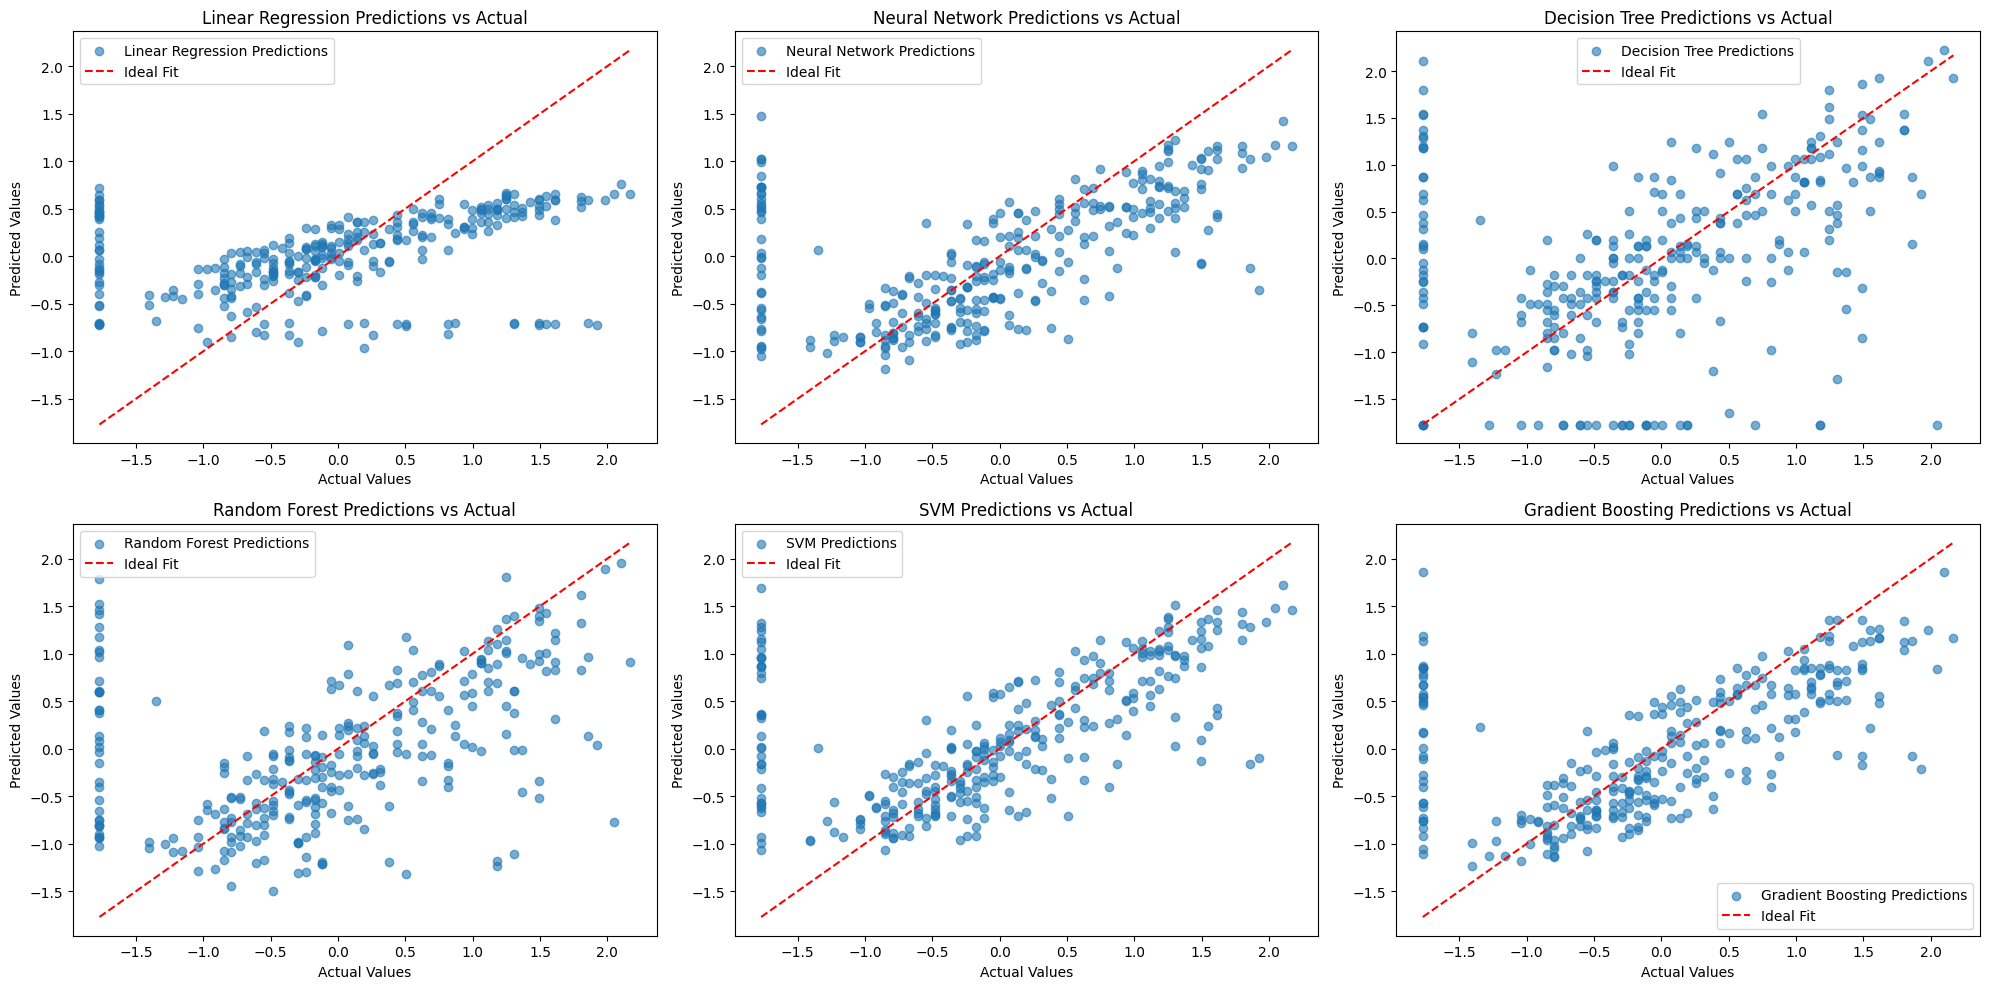


Best Model:
Model: SVM
MAE         0.552904
MSE         0.781877
R2 Score    0.247277
Name: SVM, dtype: float64


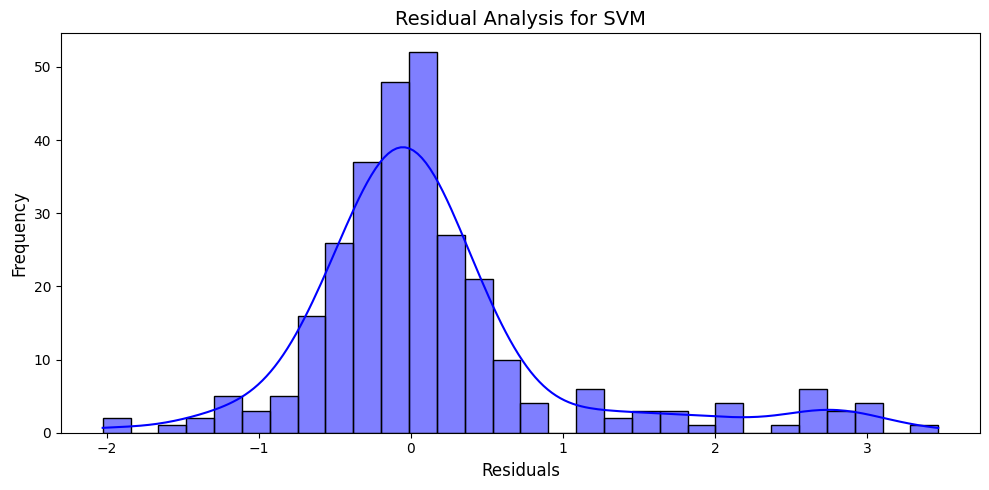

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'Neural Network': y_pred_nn,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'SVM': y_pred_svm,
    'Gradient Boosting': y_pred_gb
})
#Plot Predicted vs Actual Values for Each Model
plt.figure(figsize=(20, 10))
models = ['Linear Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting']
for i, model in enumerate(models, 1):
    plt.subplot(2, 3, i)
    plt.scatter(comparison_df['Actual'], comparison_df[model], alpha=0.6, label=f'{model} Predictions')
    plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
             [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
             color='red', linestyle='--', label='Ideal Fit')
    plt.title(f'{model} Predictions vs Actual', fontsize=12)
    plt.xlabel('Actual Values', fontsize=10)
    plt.ylabel('Predicted Values', fontsize=10)
    plt.legend()
    plt.tight_layout()
plt.show()

#  Identify the Best Model
best_model_name = results_df['MAE'].idxmin()
print("\nBest Model:")
print(f"Model: {best_model_name}")
print(results_df.loc[best_model_name])

# Additional Evaluation: Residual Analysis for the Best Model
best_model_predictions = comparison_df[best_model_name]
residuals = best_model_predictions - comparison_df['Actual']

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title(f'Residual Analysis for {best_model_name}', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()
